In [17]:
from vae import VAE
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
vae = VAE(image_channels=3)
vae.load_state_dict(torch.load('vae_model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [3]:
# Load Data
bs = 1
dataset = datasets.ImageFolder(root='./clustering',transform=transforms.Compose([transforms.ToTensor()]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=False)

In [4]:
x = dataset[np.random.randint(1, 100)][0].unsqueeze(0)
recon_x, mu, logvar = vae(x)

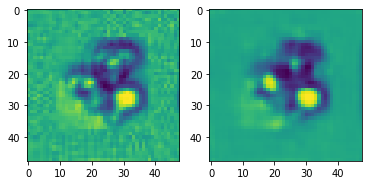

In [5]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(x[0,0].cpu().detach().numpy())
axs[1].imshow(recon_x[0,0].cpu().detach().numpy())

In [6]:
Tensor = torch.FloatTensor

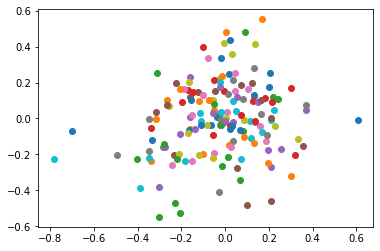

In [7]:
all_images = np.zeros([165,48,48])
all_embbedings = np.zeros([165,100])
latent_vectors = []
for idx, (images, _) in enumerate(dataloader):
    
    x = images.type(Tensor)  
    z, _, _ = vae.get_latent(x)

    
    x = x.cpu().detach().numpy()
    z = z.cpu().detach().numpy() 
    latent_vectors.append(z[0])
    all_images[idx] = x[0,0]
    all_embbedings[idx] = z[0]
    
    plt.scatter(z[:, 0], z[:, 1])

In [8]:
num = 45
tmp_distance = np.zeros([all_images.shape[0]])

for i in range(all_images.shape[0]):
    tmp_distance[i] = np.linalg.norm(all_embbedings[num]-all_embbedings[i])

In [9]:
sort_tmp = np.argsort(tmp_distance)

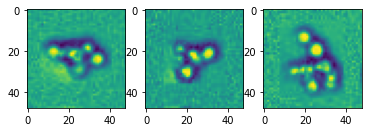

In [10]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(all_images[num])
axs[1].imshow(all_images[sort_tmp[1]])
axs[2].imshow(all_images[sort_tmp[-1]])

In [42]:
latent_vactors = np.array(latent_vectors)
latent_vactors = np.vstack(latent_vectors)

In [47]:
y_pred = KMeans(n_clusters=5).fit_predict(latent_vectors)

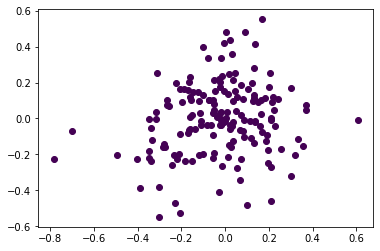

In [59]:
for i in range(165):
  plt.scatter(latent_vactors[i,0], latent_vactors[i,1], c=y_pred[i])